In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import io
%cd "C:\Users\deepe\OneDrive\Desktop\Python Datasets\Projects\Capstone"

C:\Users\deepe\OneDrive\Desktop\Python Datasets\Projects\Capstone


In [3]:
crop=pd.read_csv("Crop_recommendation.csv")

In [4]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [5]:
crop.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [6]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [7]:
crop.label.describe()

count     2200
unique      22
top       rice
freq       100
Name: label, dtype: object

In [8]:
crop.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [9]:
crop.shape

(2200, 8)

In [10]:
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [11]:
print(crop.isnull().sum())

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


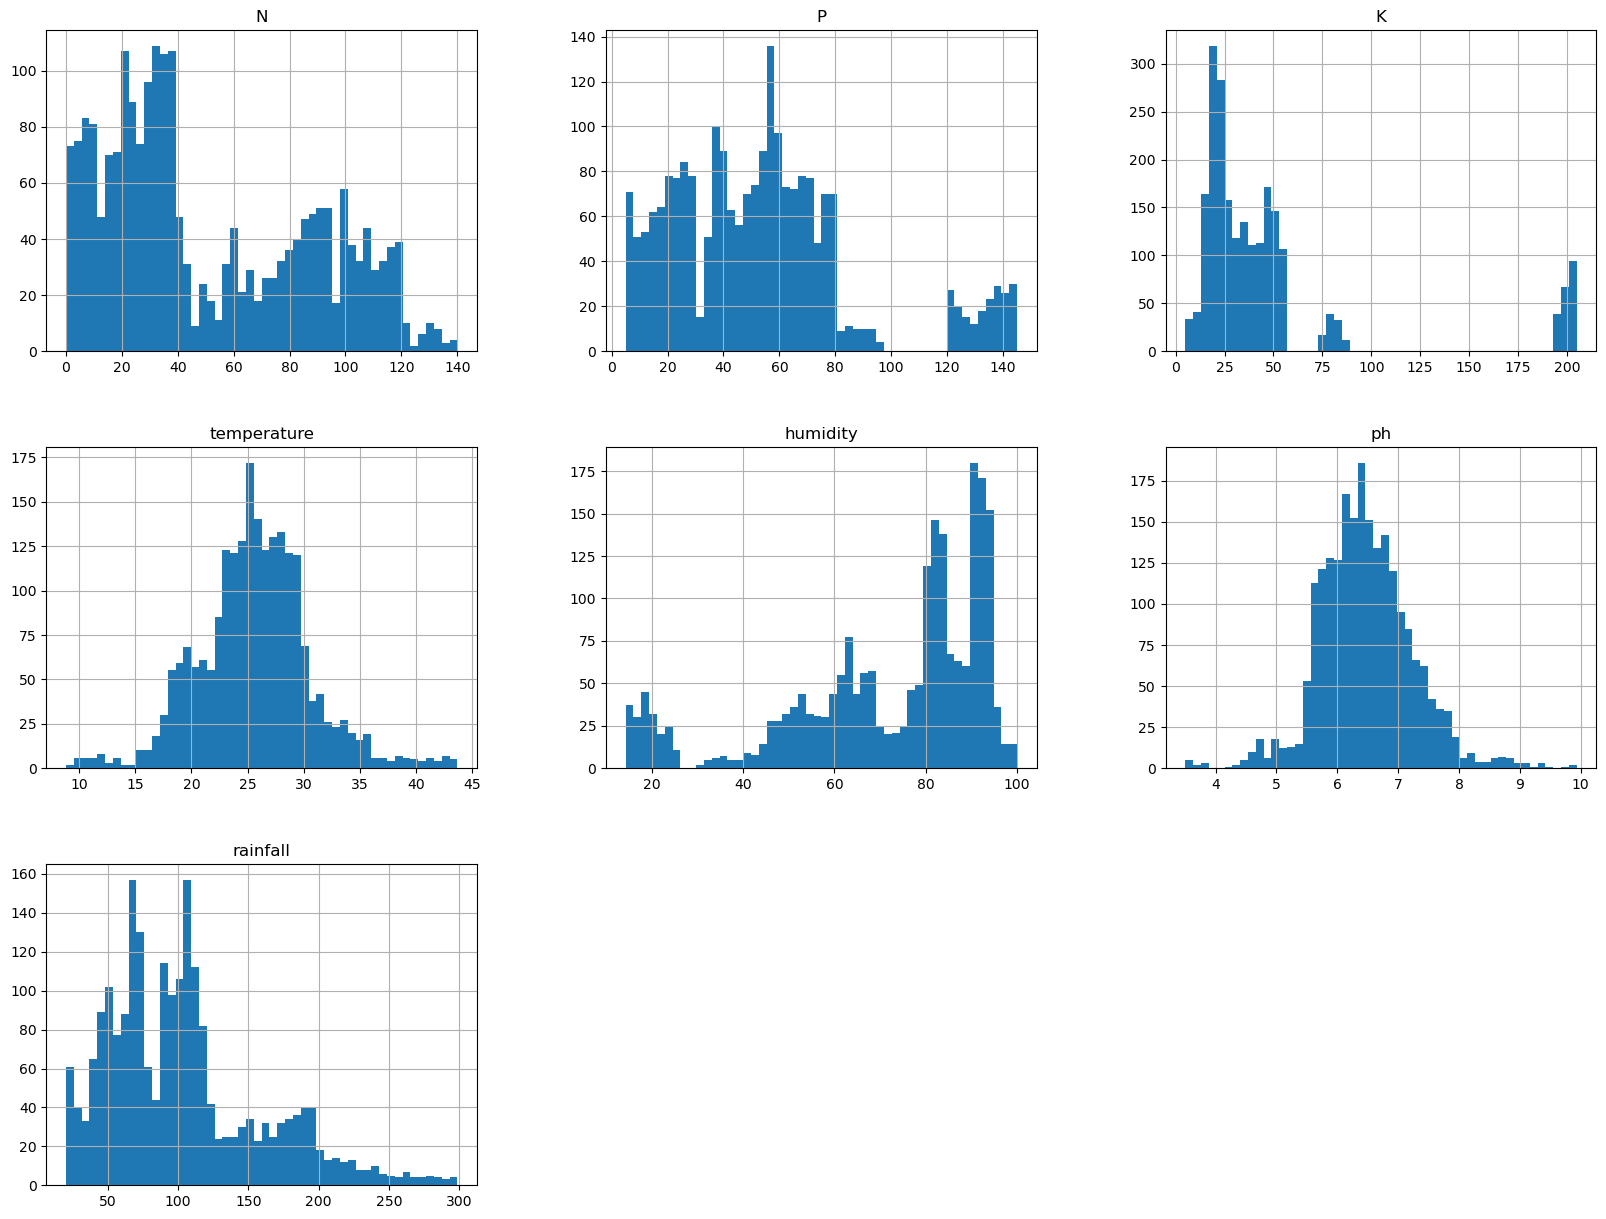

In [12]:
crop.hist(bins=50,figsize=(20,15))
plt.show()

In [13]:
crop.apply(lambda x:len(x.unique()))

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

In [14]:
crop['label'].value_counts(dropna=False)

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [15]:
objcols=crop[['label']]

In [16]:
objcols.head(2205)

,label
0,rice
1,rice
2,rice
3,rice
4,rice
...,...
2195,coffee
2196,coffee
2197,coffee
2198,coffee


In [17]:
numcols=crop[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]

In [18]:
numcols.isnull().sum().sort_values(ascending=False)/numcols.shape[0]

N              0.0
P              0.0
K              0.0
temperature    0.0
humidity       0.0
ph             0.0
rainfall       0.0
dtype: float64

In [19]:
for col in numcols.columns:
    numcols[col]=numcols[col].fillna(numcols[col].median())

C:\Users\deepe\AppData\Local\Temp\ipykernel_13088\1213558515.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numcols[col]=numcols[col].fillna(numcols[col].median())


In [20]:
numcols.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [21]:
numcols.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [22]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [23]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


## EXPLORATORY DATA ANALYSIS - EDA

HISTOGRAM:
THIS HIGHLIGHTS SKEWNESS, KURTOSIS AND OUTLIERS.
BOX PLOT:
THIS IS HIGHLIGHTS SKEWNESS AND OUTLIERS.
DENSITY CURVE:
THIS IS HIGHLIGHTS SKEWNESS AND KURTOSIS.

<Axes: ylabel='Frequency'>

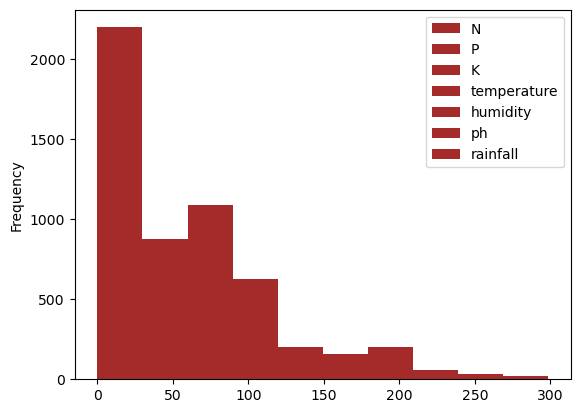

In [24]:
crop.plot(kind="hist",color="brown")

<Axes: >

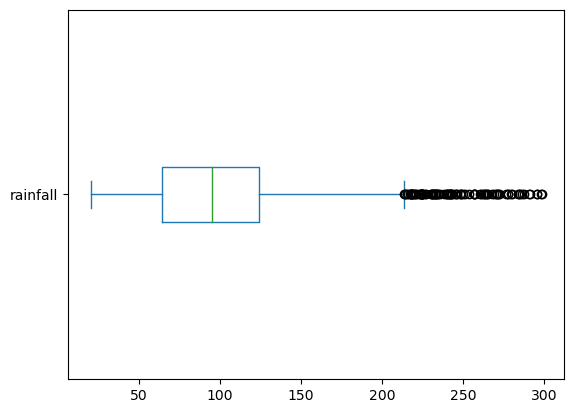

In [25]:
crop.rainfall.plot(kind="box",vert=False)

<Axes: >

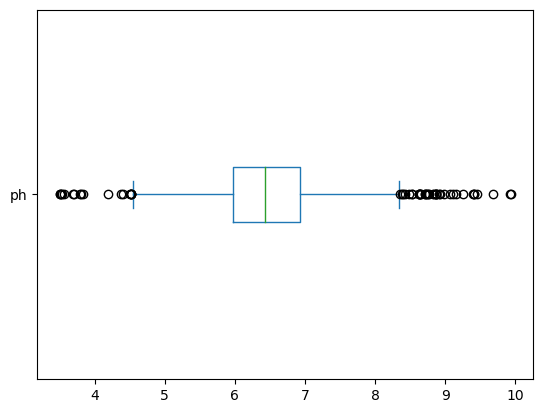

In [26]:
crop.ph.plot(kind="box",vert=False)

<Axes: >

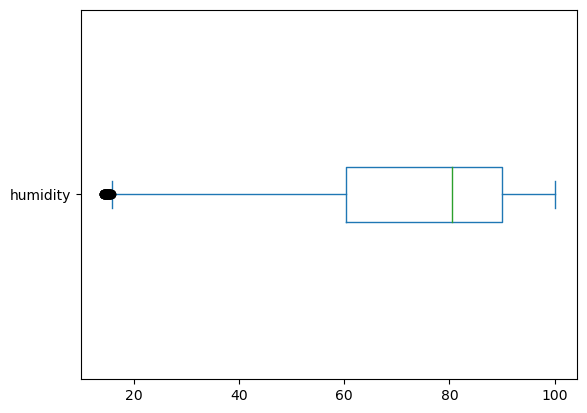

In [27]:
crop.humidity.plot(kind="box",vert=False)

<Axes: >

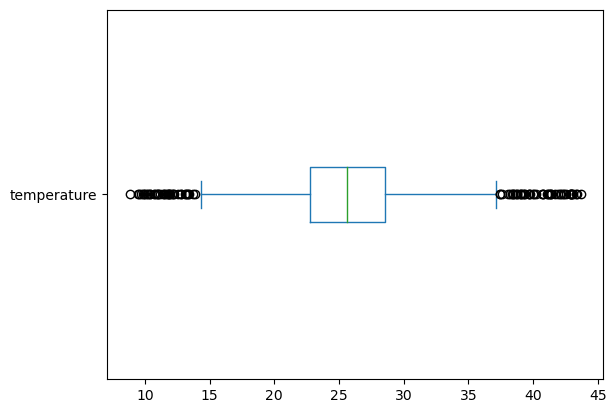

In [28]:
crop.temperature.plot(kind="box",vert=False)

<Axes: >

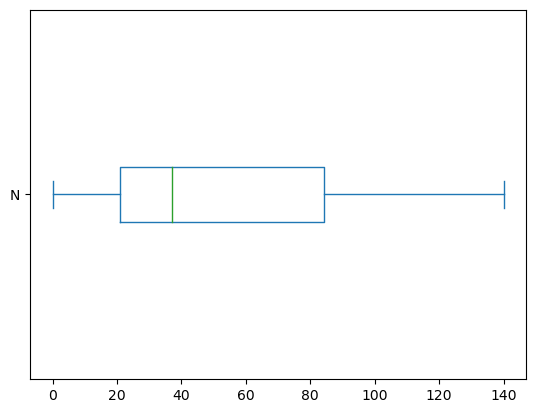

In [29]:
crop.N.plot(kind="box",vert=False)

<Axes: >

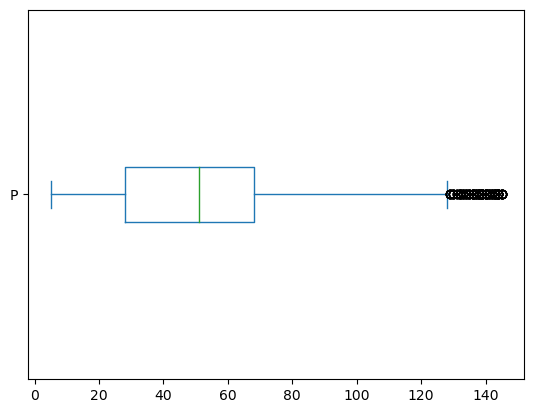

In [30]:
crop.P.plot(kind="box",vert=False)

<Axes: >

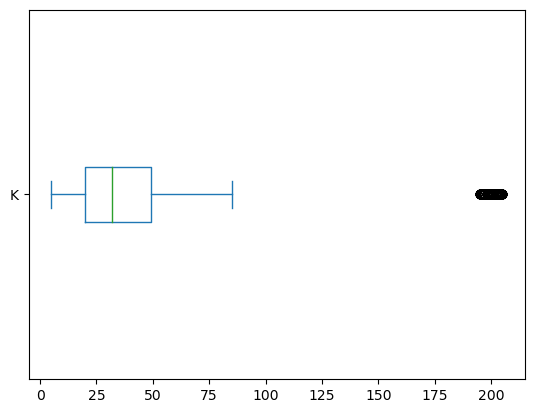

In [31]:
crop.K.plot(kind="box",vert=False)

<Axes: ylabel='Density'>

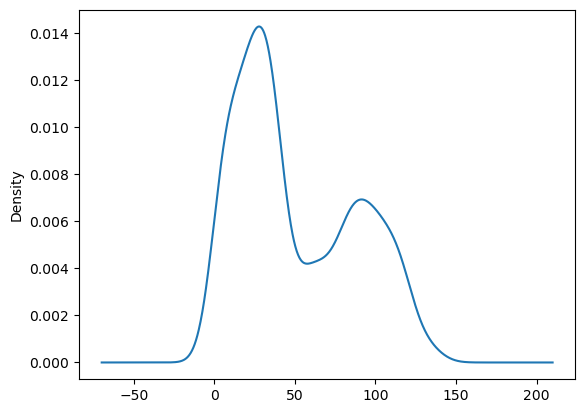

In [32]:
crop.N.plot(kind="density")

<Axes: ylabel='Density'>

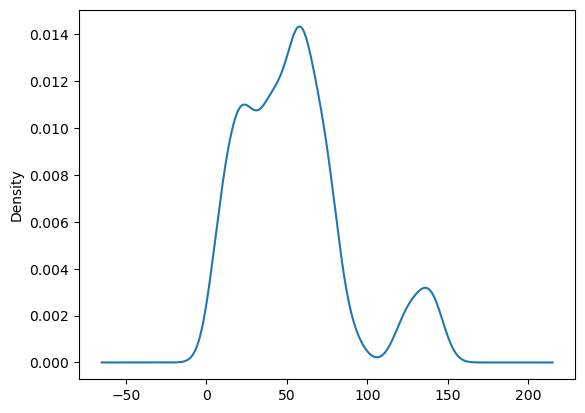

In [33]:
crop.P.plot(kind="density")

<Axes: ylabel='Density'>

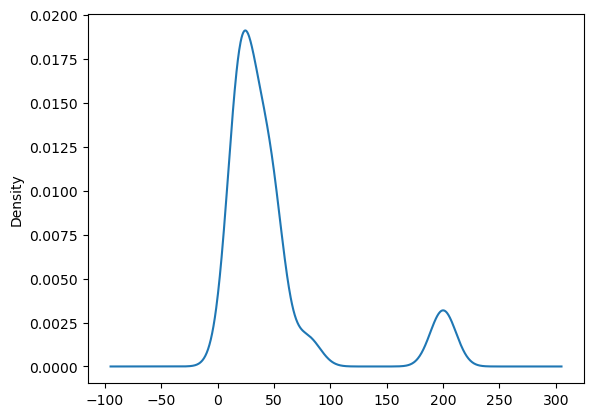

In [34]:
crop.K.plot(kind="density")

<Axes: ylabel='Density'>

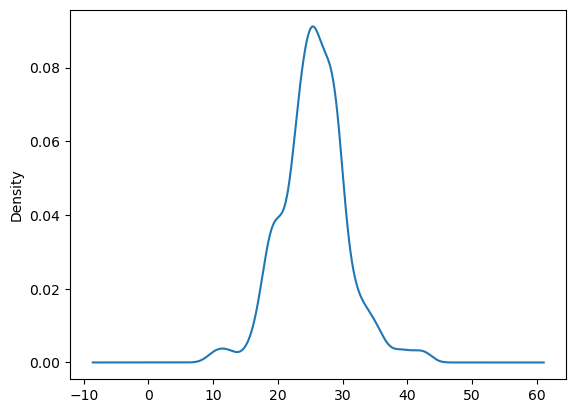

In [35]:
crop.temperature.plot(kind="density")

<Axes: ylabel='Density'>

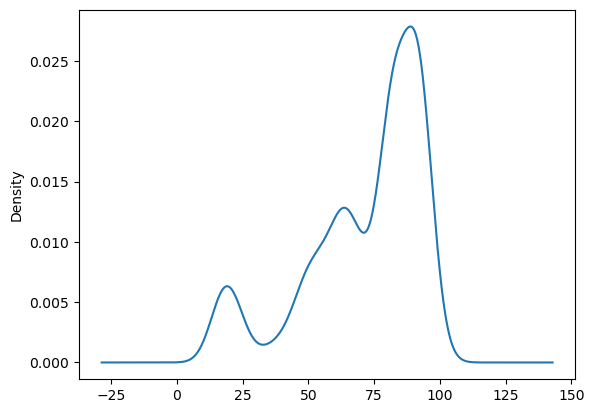

In [36]:
crop.humidity.plot(kind="density")

<Axes: ylabel='Density'>

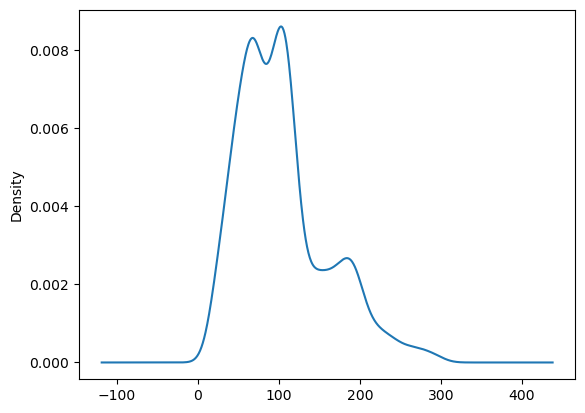

In [37]:
crop.rainfall.plot(kind="density")

<Axes: ylabel='Density'>

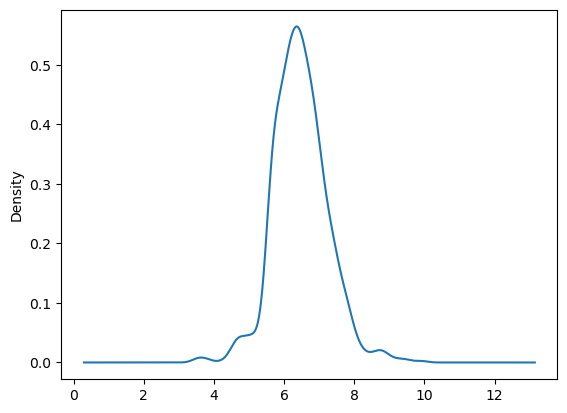

In [38]:
crop.ph.plot(kind="density")

In [39]:
import seaborn as sns

C:\Users\deepe\AppData\Local\Temp\ipykernel_13088\890166929.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crop['N'],color='red',ax=ax)
C:\Users\deepe\AppData\Local\Temp\ipykernel_13088\890166929.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crop['P'],color='green',ax=ax)


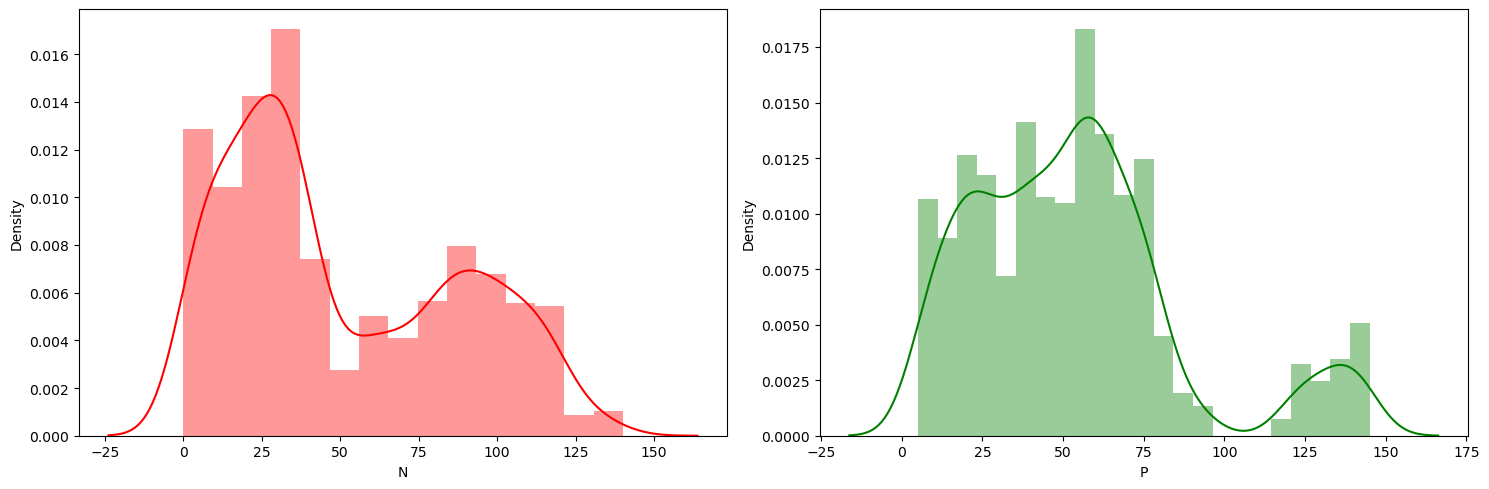

In [40]:
f=plt.figure(figsize=(15,5))
ax=f.add_subplot(121)
sns.distplot(crop['N'],color='red',ax=ax)

ax=f.add_subplot(122)
sns.distplot(crop['P'],color='green',ax=ax)
plt.tight_layout()

C:\Users\deepe\AppData\Local\Temp\ipykernel_13088\2857048422.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crop['K'],color ='red',ax=ax)
C:\Users\deepe\AppData\Local\Temp\ipykernel_13088\2857048422.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crop['temperature'],color='green',ax=ax)

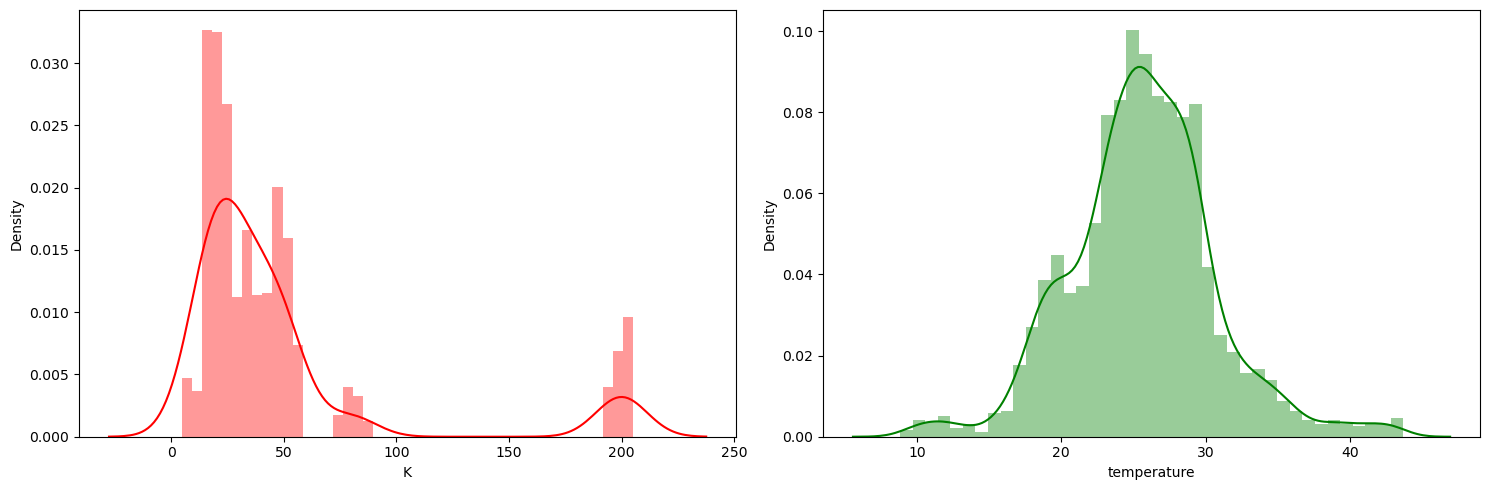

In [41]:
f=plt.figure(figsize=(15,5))
ax=f.add_subplot(121)
sns.distplot(crop['K'],color ='red',ax=ax)

ax=f.add_subplot(122)
sns.distplot(crop['temperature'],color='green',ax=ax)
plt.tight_layout()

C:\Users\deepe\AppData\Local\Temp\ipykernel_13088\392488001.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crop['humidity'],color='red',ax=ax)
C:\Users\deepe\AppData\Local\Temp\ipykernel_13088\392488001.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crop['ph'],color='green',ax=ax)


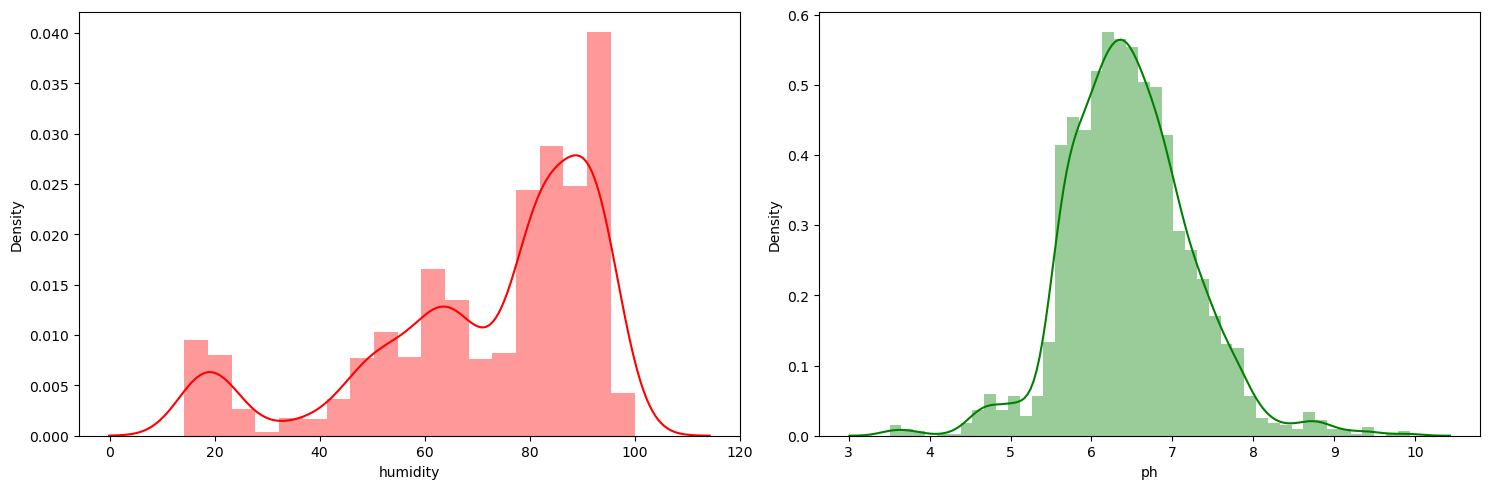

In [42]:
f=plt.figure(figsize=(15,5))
ax=f.add_subplot(121)
sns.distplot(crop['humidity'],color='red',ax=ax)

ax=f.add_subplot(122)
sns.distplot(crop['ph'],color='green',ax=ax)
plt.tight_layout()

C:\Users\deepe\AppData\Local\Temp\ipykernel_13088\2804088430.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crop['rainfall'],color ='red')


<Axes: xlabel='rainfall', ylabel='Density'>

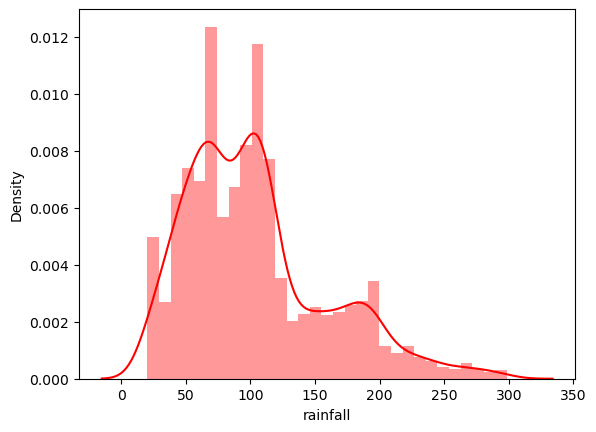

In [43]:
sns.distplot(crop['rainfall'],color ='red')

C:\Users\deepe\AppData\Local\Temp\ipykernel_13088\805242828.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(crop['label'],palette='Spectral')


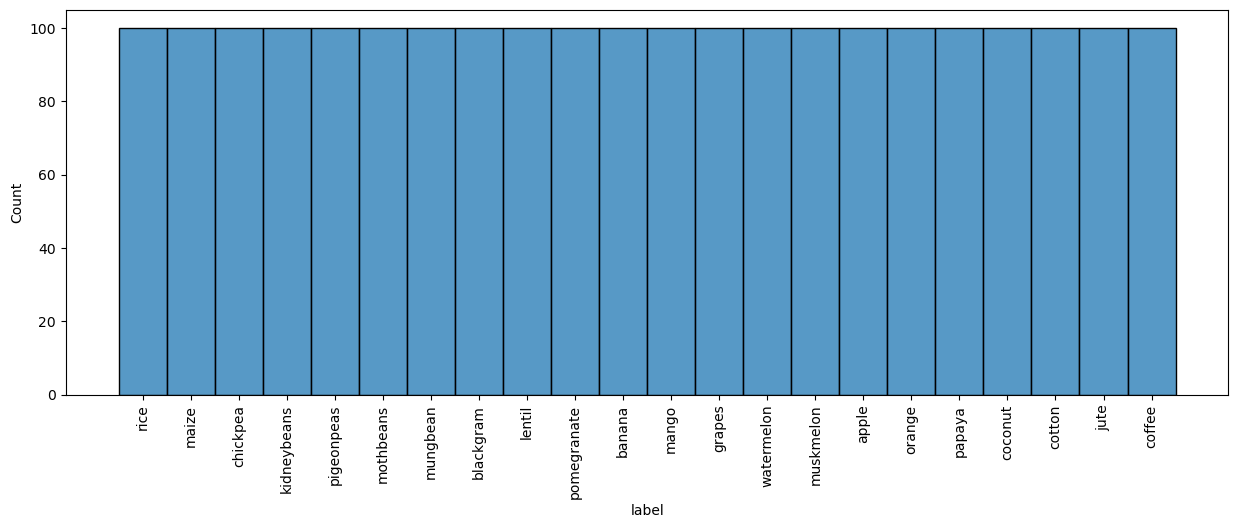

In [44]:
f=plt.figure(figsize=(15,5))
sns.histplot(crop['label'],palette='Spectral')
plt.xticks(rotation=90)
plt.show()

In [45]:
crop.label.value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

## GROUPBY() AND VISUALIZATION

In [46]:
crop.temperature.groupby(crop.label).mean()

label
apple          22.630942
banana         27.376798
blackgram      29.973340
chickpea       18.872847
coconut        27.409892
coffee         25.540477
cotton         23.988958
grapes         23.849575
jute           24.958376
kidneybeans    20.115085
lentil         24.509052
maize          22.389204
mango          31.208770
mothbeans      28.194920
mungbean       28.525775
muskmelon      28.663066
orange         22.765725
papaya         33.723859
pigeonpeas     27.741762
pomegranate    21.837842
rice           23.689332
watermelon     25.591767
Name: temperature, dtype: float64

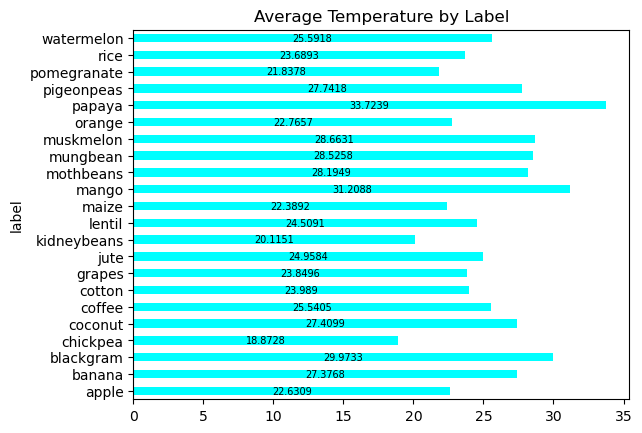

In [47]:
ax=crop.temperature.groupby(crop.label).mean().plot(kind="barh",color=["cyan"],title="Average Temperature by Label")
for i in ax.containers:
    ax.bar_label(i,fontsize=7,label_type="center")

In [48]:
crop.rainfall.groupby(crop.label).mean()

label
apple          112.654779
banana         104.626980
blackgram       67.884151
chickpea        80.058977
coconut        175.686646
coffee         158.066295
cotton          80.398043
grapes          69.611829
jute           174.792798
kidneybeans    105.919778
lentil          45.680454
maize           84.766988
mango           94.704515
mothbeans       51.198487
mungbean        48.403601
muskmelon       24.689952
orange         110.474969
papaya         142.627839
pigeonpeas     149.457564
pomegranate    107.528442
rice           236.181114
watermelon      50.786219
Name: rainfall, dtype: float64

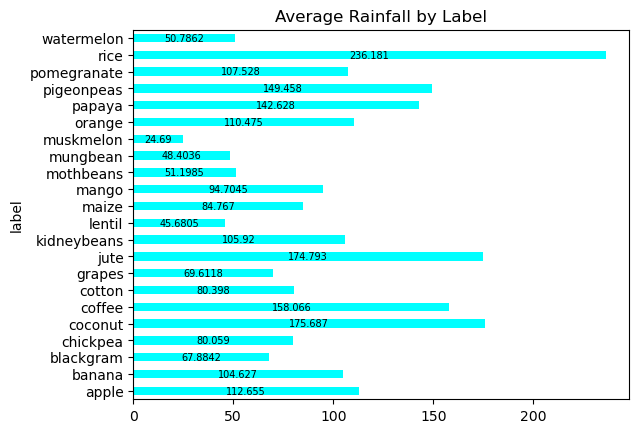

In [49]:
ax=crop.rainfall.groupby(crop.label).mean().plot(kind="barh",color=["cyan"],title="Average Rainfall by Label")
for i in ax.containers:
    ax.bar_label(i,fontsize=7,label_type="center")

In [50]:
crop.ph.groupby(crop.label).mean()

label
apple          5.929663
banana         5.983893
blackgram      7.133952
chickpea       7.336957
coconut        5.976562
coffee         6.790308
cotton         6.912675
grapes         6.025937
jute           6.732778
kidneybeans    5.749411
lentil         6.927932
maize          6.245190
mango          5.766373
mothbeans      6.831174
mungbean       6.723957
muskmelon      6.358805
orange         7.016957
papaya         6.741442
pigeonpeas     5.794175
pomegranate    6.429172
rice           6.425471
watermelon     6.495778
Name: ph, dtype: float64

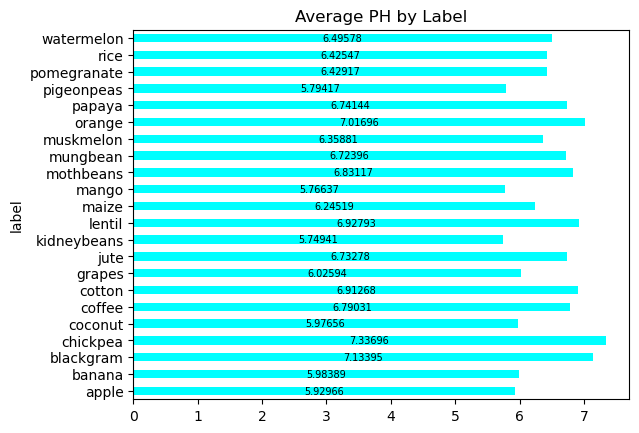

In [51]:
ax=crop.ph.groupby(crop.label).mean().plot(kind="barh",color=["cyan"],title="Average PH by Label")
for i in ax.containers:
    ax.bar_label(i,fontsize=7,label_type="center")

In [52]:
crop.humidity.groupby(crop.label).mean()

label
apple          92.333383
banana         80.358123
blackgram      65.118426
chickpea       16.860439
coconut        94.844272
coffee         58.869846
cotton         79.843474
grapes         81.875228
jute           79.639864
kidneybeans    21.605357
lentil         64.804785
maize          65.092249
mango          50.156573
mothbeans      53.160418
mungbean       85.499975
muskmelon      92.342802
orange         92.170209
papaya         92.403388
pigeonpeas     48.061633
pomegranate    90.125504
rice           82.272822
watermelon     85.160375
Name: humidity, dtype: float64

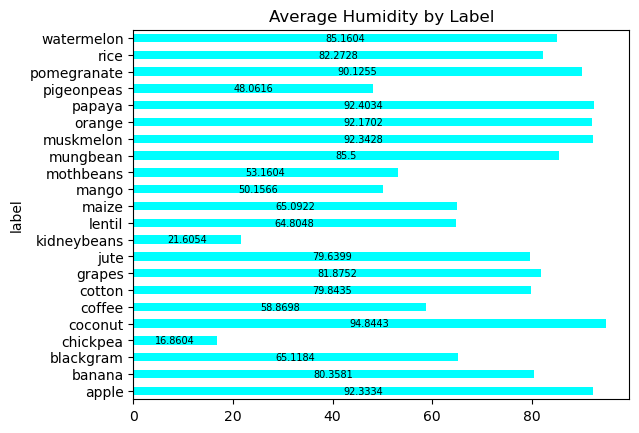

In [53]:
ax=crop.humidity.groupby(crop.label).mean().plot(kind="barh",color=["cyan"],title="Average Humidity by Label")
for i in ax.containers:
    ax.bar_label(i,fontsize=7,label_type="center")

In [54]:
crop.N.groupby(crop.label).mean()

label
apple           20.80
banana         100.23
blackgram       40.02
chickpea        40.09
coconut         21.98
coffee         101.20
cotton         117.77
grapes          23.18
jute            78.40
kidneybeans     20.75
lentil          18.77
maize           77.76
mango           20.07
mothbeans       21.44
mungbean        20.99
muskmelon      100.32
orange          19.58
papaya          49.88
pigeonpeas      20.73
pomegranate     18.87
rice            79.89
watermelon      99.42
Name: N, dtype: float64

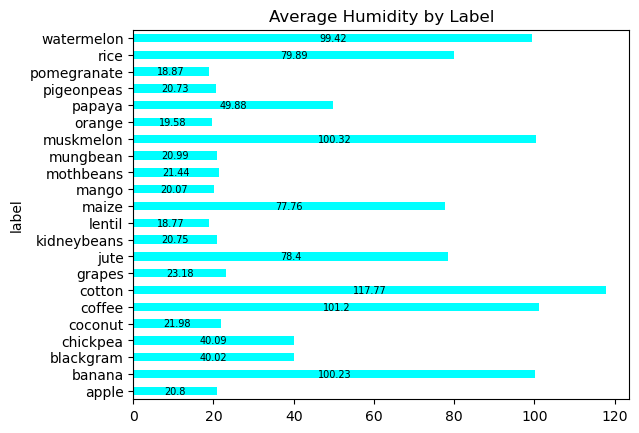

In [55]:
ax=crop.N.groupby(crop.label).mean().plot(kind="barh",color=["cyan"],title="Average Humidity by Label")
for i in ax.containers:
    ax.bar_label(i,fontsize=7,label_type="center")

In [56]:
crop.P.groupby(crop.label).mean()

label
apple          134.22
banana          82.01
blackgram       67.47
chickpea        67.79
coconut         16.93
coffee          28.74
cotton          46.24
grapes         132.53
jute            46.86
kidneybeans     67.54
lentil          68.36
maize           48.44
mango           27.18
mothbeans       48.01
mungbean        47.28
muskmelon       17.72
orange          16.55
papaya          59.05
pigeonpeas      67.73
pomegranate     18.75
rice            47.58
watermelon      17.00
Name: P, dtype: float64

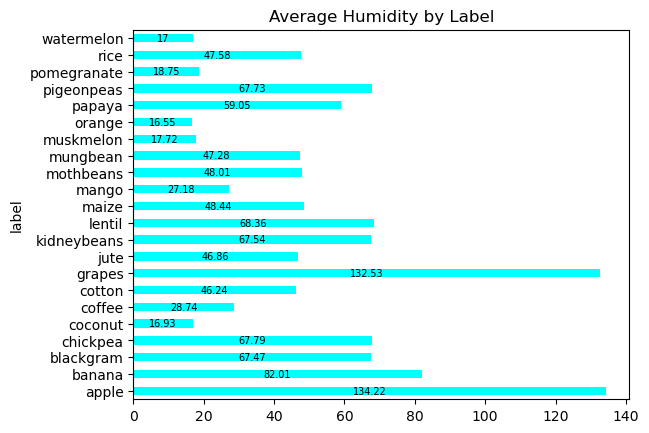

In [57]:
ax=crop.P.groupby(crop.label).mean().plot(kind="barh",color=["cyan"],title="Average Humidity by Label")
for i in ax.containers:
    ax.bar_label(i,fontsize=7,label_type="center")

In [58]:
crop.K.groupby(crop.label).mean()

label
apple          199.89
banana          50.05
blackgram       19.24
chickpea        79.92
coconut         30.59
coffee          29.94
cotton          19.56
grapes         200.11
jute            39.99
kidneybeans     20.05
lentil          19.41
maize           19.79
mango           29.92
mothbeans       20.23
mungbean        19.87
muskmelon       50.08
orange          10.01
papaya          50.04
pigeonpeas      20.29
pomegranate     40.21
rice            39.87
watermelon      50.22
Name: K, dtype: float64

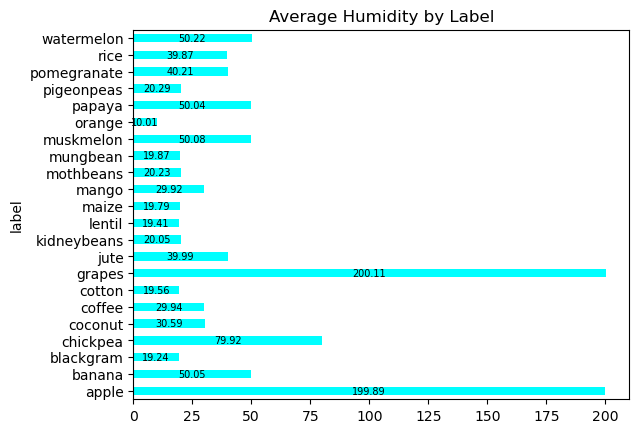

In [59]:
ax=crop.K.groupby(crop.label).mean().plot(kind="barh",color=["cyan"],title="Average Humidity by Label")
for i in ax.containers:
    ax.bar_label(i,fontsize=7,label_type="center")

## SPLITING TEST DATA AND TRAIN DATA

In [60]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(crop,random_state=0)

In [61]:
X=train_set.iloc[:,0:7]
print(X.head(5))
print()

        N    P    K  temperature   humidity        ph    rainfall
1975  134   56   18    23.808346  83.919026  6.691268   70.973583
1287   29  122  196    41.948657  81.155952  5.638328   73.068630
760    25   68   19    29.399827  64.255107  7.108450   67.476773
267    41   69   82    20.023815  16.632945  6.715587   68.978065
2007   70   43   40    24.355641  88.803910  6.176860  169.116803



In [62]:
y=train_set.iloc[:,7]
print(y.head(5))
print()

1975       cotton
1287       grapes
760     blackgram
267      chickpea
2007         jute
Name: label, dtype: object



In [63]:
X=test_set.iloc[:,0:7]
print(X.shape)
y=test_set.iloc[:,7]
y= np.array([y]).reshape(550,1)

(550, 7)


C:\Users\deepe\AppData\Local\Temp\ipykernel_13088\3497978509.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=crop.corr(),annot=True,cmap="inferno",linecolor="black",linewidths=0.5)


<Axes: >

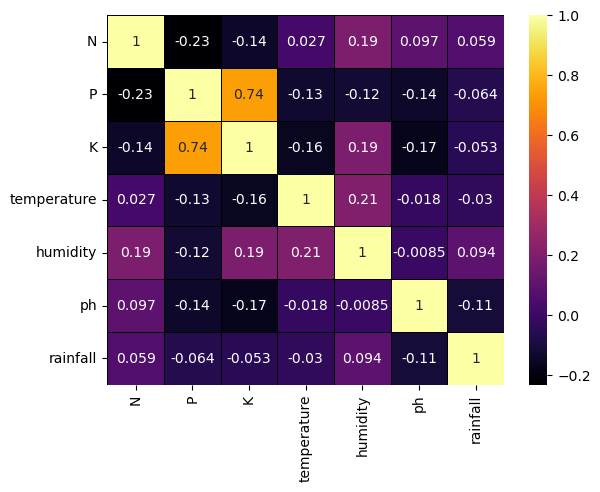

In [64]:
sns.heatmap(data=crop.corr(),annot=True,cmap="inferno",linecolor="black",linewidths=0.5)

# MODEL BUILDINGS

## K Neighbours Classifier

In [65]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [66]:
knn=KNeighborsClassifier(n_neighbors=10)

In [67]:
knn.fit(X,y)

C:\Users\deepe\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=10)

In [68]:
from sklearn.metrics import classification_report

In [69]:
knn_predicted = knn.predict(X)
print(classification_report(y,knn_predicted))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        24
      banana       1.00      1.00      1.00        24
   blackgram       0.96      1.00      0.98        26
    chickpea       1.00      1.00      1.00        28
     coconut       1.00      1.00      1.00        19
      coffee       1.00      1.00      1.00        24
      cotton       0.88      1.00      0.93        21
      grapes       1.00      1.00      1.00        24
        jute       0.82      1.00      0.90        28
 kidneybeans       0.85      1.00      0.92        23
      lentil       0.94      0.94      0.94        17
       maize       1.00      0.86      0.93        22
       mango       1.00      1.00      1.00        24
   mothbeans       0.96      0.93      0.95        29
    mungbean       1.00      1.00      1.00        27
   muskmelon       1.00      1.00      1.00        27
      orange       1.00      1.00      1.00        27
      papaya       1.00    

In [71]:
np.mean([0.95454545, 0.94545455, 0.97272727, 0.94545455, 0.96363636])

0.9563636360000001

## Desicion Tree Classifier

In [72]:
from sklearn.tree import DecisionTreeClassifier

In [73]:
dtc=DecisionTreeClassifier()

In [74]:
dtcmodel=dtc.fit(X,y)

In [75]:
dtcmodel.score(X,y)

1.0

## LINEAR SUPPORT VECTOR CLASSIFICATION (SVC)

In [76]:
from sklearn.svm import LinearSVC

In [77]:
lsvc=LinearSVC()

In [78]:
lsvc=LinearSVC(C=5,random_state=67).fit(X,y)

C:\Users\deepe\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\deepe\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [79]:
li_predicted=lsvc.predict(X)

In [80]:
lsvc.predict(X[200:201])

array(['pigeonpeas'], dtype=object)

In [81]:
print(y[200])

['coconut']


In [82]:
print(classification_report(y,li_predicted))

              precision    recall  f1-score   support

       apple       0.00      0.00      0.00        24
      banana       1.00      0.92      0.96        24
   blackgram       1.00      0.19      0.32        26
    chickpea       1.00      1.00      1.00        28
     coconut       1.00      0.89      0.94        19
      coffee       1.00      1.00      1.00        24
      cotton       1.00      0.71      0.83        21
      grapes       1.00      0.54      0.70        24
        jute       0.00      0.00      0.00        28
 kidneybeans       0.96      1.00      0.98        23
      lentil       1.00      0.82      0.90        17
       maize       0.42      1.00      0.59        22
       mango       1.00      0.96      0.98        24
   mothbeans       0.77      0.79      0.78        29
    mungbean       0.96      1.00      0.98        27
   muskmelon       1.00      1.00      1.00        27
      orange       1.00      1.00      1.00        27
      papaya       0.50    

C:\Users\deepe\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\deepe\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\deepe\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [83]:
from sklearn.model_selection import cross_val_score

In [84]:
from sklearn.svm import SVC

In [85]:
svc=SVC().fit(X,y)

C:\Users\deepe\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [86]:
svc.predict(X[233:243])

array(['kidneybeans', 'pomegranate', 'coconut', 'mango', 'mungbean',
       'cotton', 'rice', 'chickpea', 'mungbean', 'apple'], dtype=object)

In [87]:
print(y[233:243])

[['kidneybeans']
 ['pomegranate']
 ['coconut']
 ['mango']
 ['mungbean']
 ['cotton']
 ['rice']
 ['chickpea']
 ['mungbean']
 ['apple']]


In [88]:
from sklearn.metrics import classification_report

In [89]:
svm_predicted=svc.predict(X)

In [90]:
print(classification_report(y,svm_predicted))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        24
      banana       1.00      1.00      1.00        24
   blackgram       0.93      0.96      0.94        26
    chickpea       1.00      1.00      1.00        28
     coconut       1.00      1.00      1.00        19
      coffee       1.00      1.00      1.00        24
      cotton       0.91      1.00      0.95        21
      grapes       1.00      1.00      1.00        24
        jute       0.90      1.00      0.95        28
 kidneybeans       0.85      1.00      0.92        23
      lentil       1.00      0.76      0.87        17
       maize       1.00      0.91      0.95        22
       mango       1.00      1.00      1.00        24
   mothbeans       0.91      1.00      0.95        29
    mungbean       1.00      1.00      1.00        27
   muskmelon       1.00      1.00      1.00        27
      orange       1.00      1.00      1.00        27
      papaya       1.00    

In [91]:
cross_val_score(svc,X,y)

C:\Users\deepe\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\deepe\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\deepe\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\deepe\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

array([0.95454545, 0.94545455, 0.97272727, 0.94545455, 0.96363636])

In [92]:
np.mean([0.95454545, 0.94545455, 0.97272727, 0.94545455, 0.96363636])

0.9563636360000001